In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [2]:
gas_df = pd.read_csv("./datasets/gasoline-prices-by-country.csv")

In [3]:
# Get the countries that have valid values for the filtered gas prices, they have data from 1995 to 2016
country_check_year = gas_df[gas_df["year"] == 1995]
valid_countries = country_check_year[country_check_year["filtered gas prices"].notna()]
countries_list = valid_countries["Country Name"].values.tolist()

In [4]:
# Collect all the data for the countries found in the cell above
gas_valid_country = gas_df[gas_df["Country Name"].isin(countries_list)]
gas_valid_country = gas_valid_country[gas_valid_country["year"] >= 1995]
gas_valid_country = gas_valid_country.drop("gas prices", axis=1)
gas_valid_country

,Country Name,year,filtered gas prices
30,Africa Eastern and Southern,1995,0.520000
31,Africa Eastern and Southern,1996,0.496667
32,Africa Eastern and Southern,1997,0.473333
33,Africa Eastern and Southern,1998,0.450000
34,Africa Eastern and Southern,1999,0.505000
...,...,...,...
5377,Zimbabwe,2012,1.520000
5378,Zimbabwe,2013,1.540000
5379,Zimbabwe,2014,1.560000
5380,Zimbabwe,2015,1.450000


In [5]:
# pivot the data
pivot_df = gas_valid_country.pivot(index='Country Name', columns='year', values='filtered gas prices')
pivot_df = pivot_df.reset_index()
pivot_df

year,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Africa Eastern and Southern,0.520,0.496667,0.473333,0.45,0.5050,0.560,0.5400,0.520,0.700,...,1.1275,1.215,1.2500,1.285,1.3775,1.470,1.4225,1.375,1.16250,0.95000
1,Africa Western and Central,0.795,0.756667,0.718333,0.68,0.6600,0.640,0.6625,0.685,0.785,...,1.0575,1.085,1.1375,1.190,1.1800,1.170,1.2075,1.245,1.09750,0.95000
2,Algeria,0.400,0.370000,0.340000,0.31,0.2900,0.270,0.2450,0.220,0.270,...,0.3300,0.340,0.3300,0.320,0.3050,0.290,0.2800,0.270,0.27500,0.28000
3,Argentina,0.600,0.713333,0.826667,0.94,1.0050,1.070,0.8500,0.630,0.630,...,0.7000,0.780,0.8700,0.960,1.2100,1.460,1.4900,1.520,1.31000,1.10000
4,Austria,1.150,1.113333,1.076667,1.04,0.9300,0.820,0.8300,0.840,1.080,...,1.3450,1.370,1.5000,1.630,1.7200,1.810,1.7050,1.600,1.40000,1.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Uzbekistan,0.320,0.250000,0.180000,0.11,0.1250,0.140,0.2600,0.380,0.365,...,1.1000,1.350,1.1350,0.920,0.9700,1.020,1.0200,1.020,1.02500,1.03000
130,"Venezuela, RB",0.030,0.066667,0.103333,0.14,0.1300,0.120,0.0850,0.050,0.045,...,0.0250,0.020,0.0215,0.023,0.0230,0.023,0.0190,0.015,0.00754,0.00008
131,Vietnam,0.340,0.343333,0.346667,0.35,0.3650,0.380,0.3600,0.340,0.410,...,0.7350,0.800,0.8400,0.880,1.0150,1.150,1.0950,1.040,0.92000,0.80000
132,Zambia,0.600,0.576667,0.553333,0.53,0.5775,0.625,0.6725,0.720,0.910,...,1.5050,1.700,1.6800,1.660,1.5700,1.480,1.5800,1.680,1.54000,1.40000


In [6]:
def get_pca(X):
    """
    Transform data to 2D points for plotting. Should return an array with shape (n, 2).
    """
    flatten_model = make_pipeline(
        # TODO
        MinMaxScaler(),
        PCA(2)
    )
    X2 = flatten_model.fit_transform(X)
    assert X2.shape == (X.shape[0], 2)
    return X2

def get_clusters(X):
    """
    Find clusters of the weather data.
    """
    model = make_pipeline(
        # TODO
        MinMaxScaler(),
        KMeans(n_clusters=3)
    )
    model.fit(X)
    return model.predict(X)

In [7]:
X = pivot_df.drop(["Country Name"], axis=1)
y = pivot_df["Country Name"]

In [8]:
X2 = get_pca(X)
#print(X2.components_)
#print(X2.explained_variance_ratio)
clusters = get_clusters(X)

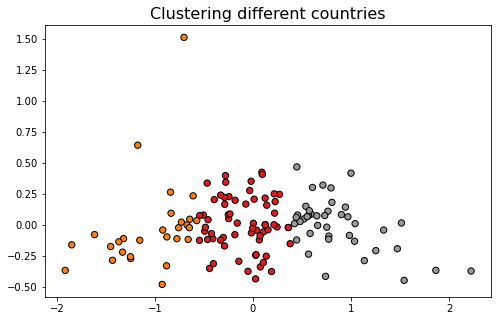

In [9]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(X2[:, 0], X2[:, 1], c=clusters, cmap='Set1', edgecolor='k', s=40)
#plt.legend(handles=scatter.legend_elements()[0], labels=['1','2','3'], loc="upper right")
plt.title("Clustering different countries", fontsize=16)
plt.savefig("cluster-fig.png")
plt.show()

In [10]:
pivot_df["Cluster ID"] = clusters
pivot_df

year,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Cluster ID
0,Africa Eastern and Southern,0.520,0.496667,0.473333,0.45,0.5050,0.560,0.5400,0.520,0.700,...,1.215,1.2500,1.285,1.3775,1.470,1.4225,1.375,1.16250,0.95000,0
1,Africa Western and Central,0.795,0.756667,0.718333,0.68,0.6600,0.640,0.6625,0.685,0.785,...,1.085,1.1375,1.190,1.1800,1.170,1.2075,1.245,1.09750,0.95000,0
2,Algeria,0.400,0.370000,0.340000,0.31,0.2900,0.270,0.2450,0.220,0.270,...,0.340,0.3300,0.320,0.3050,0.290,0.2800,0.270,0.27500,0.28000,2
3,Argentina,0.600,0.713333,0.826667,0.94,1.0050,1.070,0.8500,0.630,0.630,...,0.780,0.8700,0.960,1.2100,1.460,1.4900,1.520,1.31000,1.10000,0
4,Austria,1.150,1.113333,1.076667,1.04,0.9300,0.820,0.8300,0.840,1.080,...,1.370,1.5000,1.630,1.7200,1.810,1.7050,1.600,1.40000,1.20000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Uzbekistan,0.320,0.250000,0.180000,0.11,0.1250,0.140,0.2600,0.380,0.365,...,1.350,1.1350,0.920,0.9700,1.020,1.0200,1.020,1.02500,1.03000,2
130,"Venezuela, RB",0.030,0.066667,0.103333,0.14,0.1300,0.120,0.0850,0.050,0.045,...,0.020,0.0215,0.023,0.0230,0.023,0.0190,0.015,0.00754,0.00008,2
131,Vietnam,0.340,0.343333,0.346667,0.35,0.3650,0.380,0.3600,0.340,0.410,...,0.800,0.8400,0.880,1.0150,1.150,1.0950,1.040,0.92000,0.80000,2
132,Zambia,0.600,0.576667,0.553333,0.53,0.5775,0.625,0.6725,0.720,0.910,...,1.700,1.6800,1.660,1.5700,1.480,1.5800,1.680,1.54000,1.40000,0


In [11]:
country_cluster_id = pivot_df[["Country Name", "Cluster ID"]]
country_cluster_id_0 = country_cluster_id[country_cluster_id["Cluster ID"] == 0]
country_cluster_id_1 = country_cluster_id[country_cluster_id["Cluster ID"] == 1]
country_cluster_id_2 = country_cluster_id[country_cluster_id["Cluster ID"] == 2]

In [12]:
# These following lines can be uncommented to see which countries belong to which group
#print(country_cluster_id_0.to_string())
#print(country_cluster_id_1.to_string())
#print(country_cluster_id_2.to_string())